In [71]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [3]:
df = pd.read_csv(r"C:\Users\Pratyush Rohilla\Downloads\cleaned_data_updated__csv_.csv")
#"C:\Users\Pratyush Rohilla\Downloads\2022_2023_football_summer_transfers_v2.csv"

In [5]:
df.head(10)

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Centre-Forward,21,150.0,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60.00,False
1,Antony,Right Winger,22,35.0,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95.00,False
2,Wesley Fofana,Centre-Back,21,40.0,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80.40,False
3,Darwin Núñez,Centre-Forward,23,55.0,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75.00,False
4,Casemiro,Defensive Midfield,30,40.0,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70.65,False
5,Alexander Isak,Centre-Forward,22,30.0,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70.00,False
6,Matthijs de Ligt,Centre-Back,22,70.0,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67.00,False
7,Raheem Sterling,Left Winger,27,70.0,England,Premier League,Manchester City,England,Premier League,Chelsea FC,56.20,False
8,Sadio Mané,Left Winger,30,70.0,England,Premier League,Liverpool FC,Germany,Bundesliga,Bayern Munich,32.00,False
9,Romelu Lukaku,Centre-Forward,29,70.0,England,Premier League,Chelsea FC,Italy,Serie A,Inter Milan,8.00,True


In [151]:
df.shape

(649, 12)

In [7]:
df['loan'].value_counts()

loan
False    451
True     198
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          649 non-null    object 
 1   position      649 non-null    object 
 2   age           649 non-null    int64  
 3   market_value  649 non-null    float64
 4   country_from  649 non-null    object 
 5   league_from   649 non-null    object 
 6   club_from     649 non-null    object 
 7   country_to    649 non-null    object 
 8   league_to     649 non-null    object 
 9   club_to       649 non-null    object 
 10  fee           649 non-null    float64
 11  loan          649 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 56.5+ KB


In [11]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

In [13]:
df.describe()

,age,market_value,fee
count,649.000000,649.000000,649.000000
mean,25.328197,10.222920,5.851248
std,3.864426,12.666204,12.275367
min,17.000000,0.500000,0.000000
25%,22.000000,2.800000,0.000000
50%,25.000000,6.000000,0.500000
75%,28.000000,13.000000,5.230000
max,37.000000,150.000000,95.000000


In [15]:
df['loan'] = df['loan'].map({False:0, True :1})
df

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Centre-Forward,21,150.00,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60.00,0
1,Antony,Right Winger,22,35.00,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95.00,0
2,Wesley Fofana,Centre-Back,21,40.00,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80.40,0
3,Darwin Núñez,Centre-Forward,23,55.00,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75.00,0
4,Casemiro,Defensive Midfield,30,40.00,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...
644,Melle Meulensteen,Centre-Back,22,0.80,Netherlands,Eredivisie,RKC Waalwijk,Netherlands,Eredivisie,Vitesse Arnhem,1.00,0
645,Rodrigo Guth,Centre-Back,21,0.75,Italy,Serie A,Atalanta BC,Netherlands,Eredivisie,Fortuna Sittard,1.00,0
646,Luuk Brouwers,Defensive Midfield,24,1.00,Netherlands,Eredivisie,Go Ahead Eagles,Netherlands,Eredivisie,FC Utrecht,0.75,0
647,Lucas Perri,Goalkeeper,24,1.00,Brazil,Série A,São Paulo Futebol Clube,Brazil,Série A,Botafogo de Futebol e Regatas,0.35,0


In [17]:
df['loan'].value_counts()

loan
0    451
1    198
Name: count, dtype: int64

In [19]:
df.dtypes

name             object
position         object
age               int64
market_value    float64
country_from     object
league_from      object
club_from        object
country_to       object
league_to        object
club_to          object
fee             float64
loan              int64
dtype: object

In [23]:
df.columns

Index(['name', 'position', 'age', 'market_value', 'country_from',
       'league_from', 'club_from', 'country_to', 'league_to', 'club_to', 'fee',
       'loan'],
      dtype='object')

In [25]:
df2=df.drop(columns=['name', 'league_from', 'club_from','league_to','club_to','loan'])

In [27]:
df2

,position,age,market_value,country_from,country_to,fee
0,Centre-Forward,21,150.00,Germany,England,60.00
1,Right Winger,22,35.00,Netherlands,England,95.00
2,Centre-Back,21,40.00,England,England,80.40
3,Centre-Forward,23,55.00,Portugal,England,75.00
4,Defensive Midfield,30,40.00,Spain,England,70.65
...,...,...,...,...,...,...
644,Centre-Back,22,0.80,Netherlands,Netherlands,1.00
645,Centre-Back,21,0.75,Italy,Netherlands,1.00
646,Defensive Midfield,24,1.00,Netherlands,Netherlands,0.75
647,Goalkeeper,24,1.00,Brazil,Brazil,0.35


In [29]:
categorical_features=[feature for feature in df2.columns if df2[feature].dtype=='O']
categorical_features

['position', 'country_from', 'country_to']

In [35]:
unique_categories = df2['position'].nunique()
unique_categories

14

In [37]:
unique_categories2 = df2['country_from'].nunique()
unique_categories2

9

In [39]:
unique_categories3 = df['country_to'].nunique() 
unique_categories3

9

In [43]:
pd.get_dummies(df2,drop_first=True).shape  # too many columns 

(649, 32)

In [45]:
null_counts = df2.isnull().sum()
null_counts

position        0
age             0
market_value    0
country_from    0
country_to      0
fee             0
dtype: int64

In [57]:
df3=df2

In [ ]:
# df3['position'] = df['position'].map({False:0, True :1})
# df

In [87]:
mapping = {
    'Centre-Back': 1,  # Map 'A' to 1
    'Centre-Forward': 1,  # Map 'B' to 1
    'Central Midfield': 1,  # Map 'C' to 0
    'Left-Back': 0,  # Map 'D' to 0
    'Defensive Midfield': 1,   # Map 'E' to 0
    'Right-Back':0,
    'Attacking Midfield':1,
    'Right Winger':0,
    'Left Winger':0,
    'Goalkeeper':0,
    'Second Striker':1,
    'Right Midfield':0,
    'Left Midfield':0,
    'defence':0

}

In [89]:
pd.set_option('future.no_silent_downcasting', True)

In [91]:
df3['positions_new'] = df3['position'].replace(mapping).infer_objects(copy=False)

In [93]:
df3['positions_new'].value_counts()

positions_new
1    417
0    232
Name: count, dtype: int64

In [121]:
df3.head(1)

,position,age,market_value,country_from,country_to,fee,positions_new,country_from_new,country_to_new
0,Centre-Forward,21,150.0,Germany,England,60.0,1,1,1


In [111]:
mapping1 = {
    'Italy': 1,  # Map 'A' to 1
    'England': 1,  # Map 'B' to 1
    'France': 0,  # Map 'C' to 0
    'Germany': 1,  # Map 'D' to 0
    'Spain': 1,   # Map 'E' to 0
    'Portugal':0,
    'Netherlands':0,
    'Portugal':0,
    'Brazil':0,
    'Turkey':0
}

In [113]:
df3['country_from_new'] = df3['country_from'].replace(mapping1).infer_objects(copy=False)

In [115]:
df3['country_from_new'].value_counts()

country_from_new
1    408
0    241
Name: count, dtype: int64

In [117]:
df3['country_to_new'] = df3['country_to'].replace(mapping1).infer_objects(copy=False)

In [119]:
df3['country_to_new'].value_counts()

country_to_new
1    399
0    250
Name: count, dtype: int64

In [123]:
top_10_labels_position = [y for y in df3.position.value_counts().sort_values(ascending=False).index]
top_10_labels_position

['Centre-Back',
 'Centre-Forward',
 'Central Midfield',
 'Left-Back',
 'Defensive Midfield',
 'Right-Back',
 'Attacking Midfield',
 'Right Winger',
 'Left Winger',
 'Goalkeeper',
 'Second Striker',
 'Right Midfield',
 'Left Midfield',
 'defence']

In [125]:
top_10_labels_country_from = [y for y in df3.country_from.value_counts().sort_values(ascending=False).index]
top_10_labels_country_from

['Italy',
 'England',
 'France',
 'Germany',
 'Spain',
 'Portugal',
 'Netherlands',
 'Turkey',
 'Brazil']

In [127]:
top_10_labels_country_to = [y for y in df3.country_to.value_counts().sort_values(ascending=False).index]
top_10_labels_country_to

['Italy',
 'England',
 'Spain',
 'France',
 'Germany',
 'Turkey',
 'Netherlands',
 'Portugal',
 'Brazil']

In [129]:
# def one_hot_encoding_top_x(df, variable, top_x_labels):
#     # function to create the dummy variables for the most frequent labels
#     # we can vary the number of most frequent labels that we encode
    
#     for label in top_x_labels:
#         df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [131]:
# one_hot_encoding_top_x(df, 'position', top_10_labels_position)
# df.head()

In [133]:
df3

,position,age,market_value,country_from,country_to,fee,positions_new,country_from_new,country_to_new
0,Centre-Forward,21,150.00,Germany,England,60.00,1,1,1
1,Right Winger,22,35.00,Netherlands,England,95.00,0,0,1
2,Centre-Back,21,40.00,England,England,80.40,1,1,1
3,Centre-Forward,23,55.00,Portugal,England,75.00,1,0,1
4,Defensive Midfield,30,40.00,Spain,England,70.65,1,1,1
...,...,...,...,...,...,...,...,...,...
644,Centre-Back,22,0.80,Netherlands,Netherlands,1.00,1,0,0
645,Centre-Back,21,0.75,Italy,Netherlands,1.00,1,1,0
646,Defensive Midfield,24,1.00,Netherlands,Netherlands,0.75,1,0,0
647,Goalkeeper,24,1.00,Brazil,Brazil,0.35,0,0,0


In [137]:
df4=df3.drop(columns=['position', 'country_from', 'country_to'])

In [141]:
df4

,age,market_value,fee,positions_new,country_from_new,country_to_new
0,21,150.00,60.00,1,1,1
1,22,35.00,95.00,0,0,1
2,21,40.00,80.40,1,1,1
3,23,55.00,75.00,1,0,1
4,30,40.00,70.65,1,1,1
...,...,...,...,...,...,...
644,22,0.80,1.00,1,0,0
645,21,0.75,1.00,1,1,0
646,24,1.00,0.75,1,0,0
647,24,1.00,0.35,0,0,0


In [147]:
df4.describe

<bound method NDFrame.describe of      age  market_value    fee  positions_new  country_from_new  country_to_new
0     21        150.00  60.00              1                 1               1
1     22         35.00  95.00              0                 0               1
2     21         40.00  80.40              1                 1               1
3     23         55.00  75.00              1                 0               1
4     30         40.00  70.65              1                 1               1
..   ...           ...    ...            ...               ...             ...
644   22          0.80   1.00              1                 0               0
645   21          0.75   1.00              1                 1               0
646   24          1.00   0.75              1                 0               0
647   24          1.00   0.35              0                 0               0
648   30          1.00   0.00              1                 0               0

[649 rows x 6 col

In [149]:
df4.shape

(649, 6)

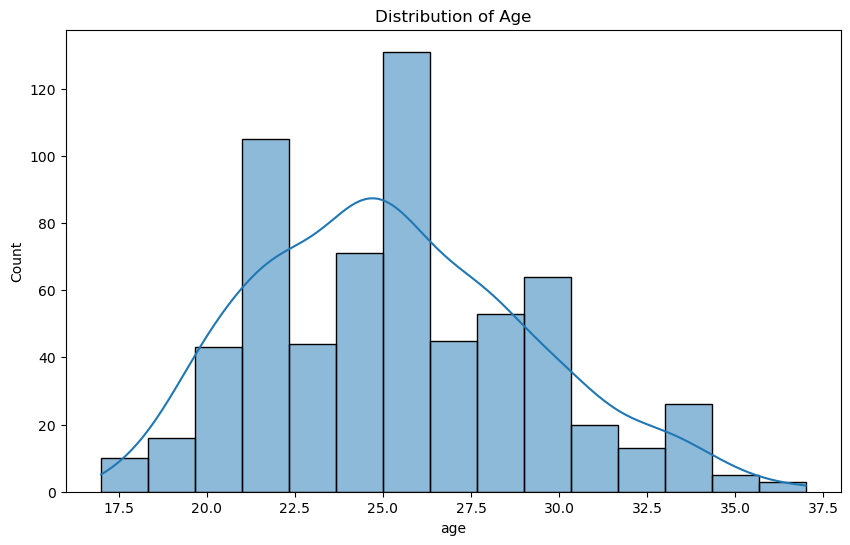

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

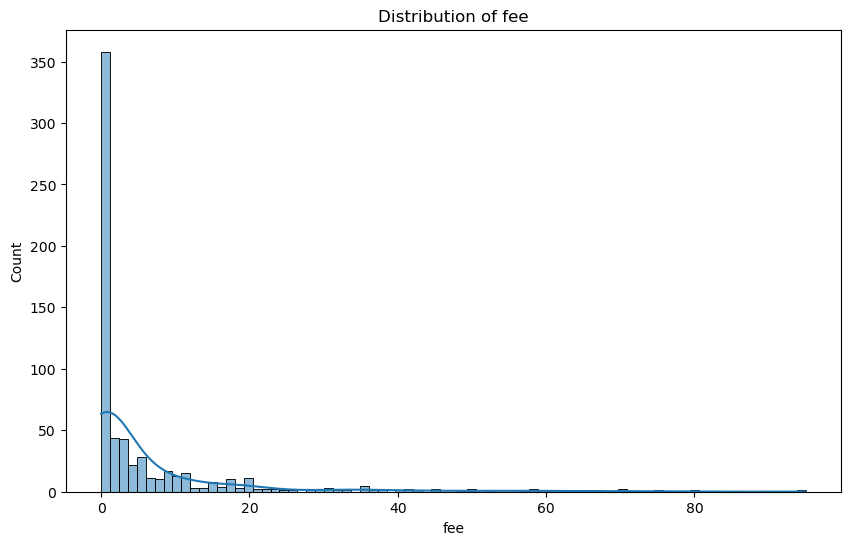

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['fee'], kde=True)
plt.title('Distribution of fee')
plt.show()

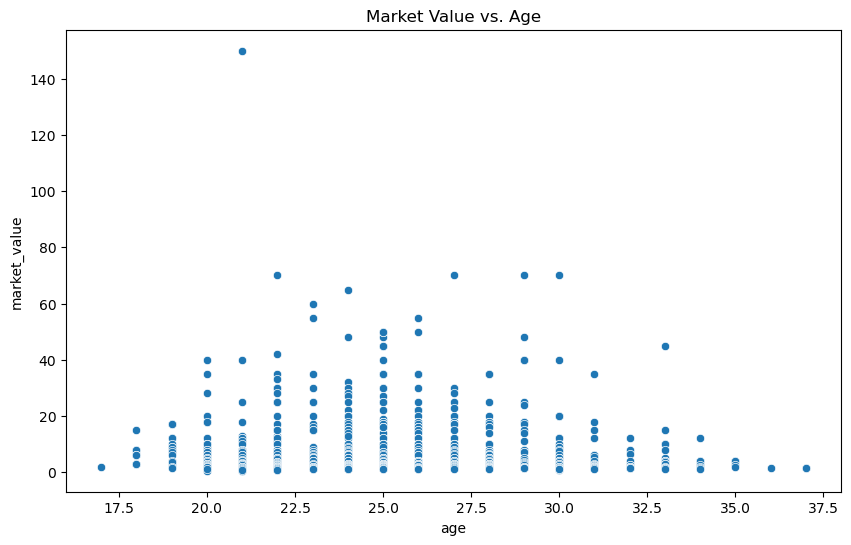

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value', data=df4)
plt.title('Market Value vs. Age')
plt.show()

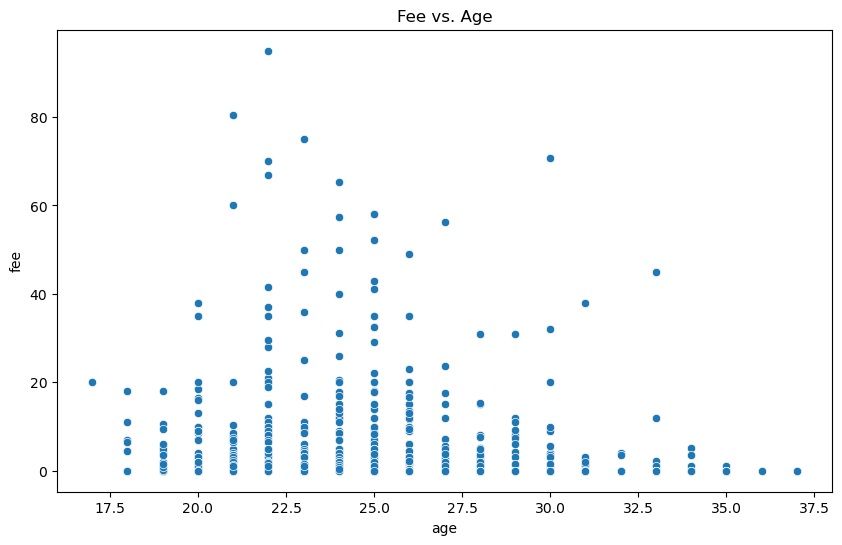

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fee', data=df4)
plt.title('Fee vs. Age')
plt.show()

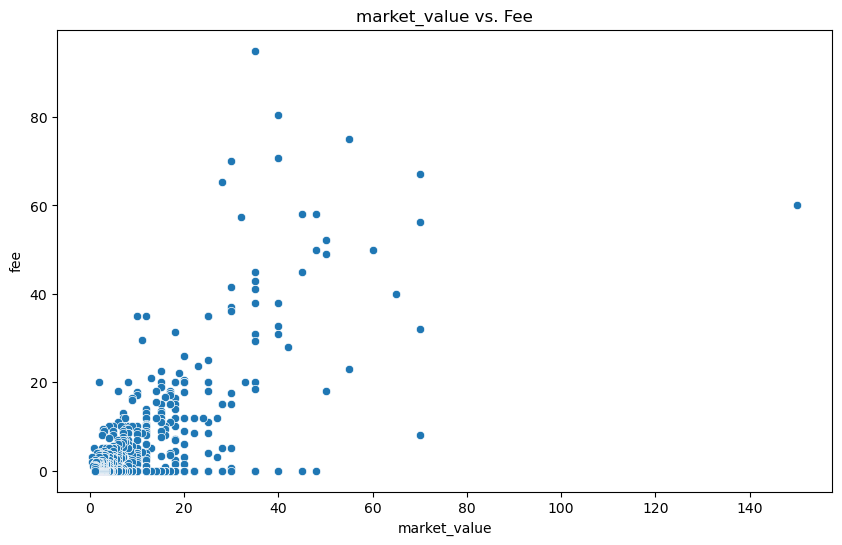

In [171]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_value', y='fee', data=df4)
plt.title('market_value vs. Fee')
plt.show()

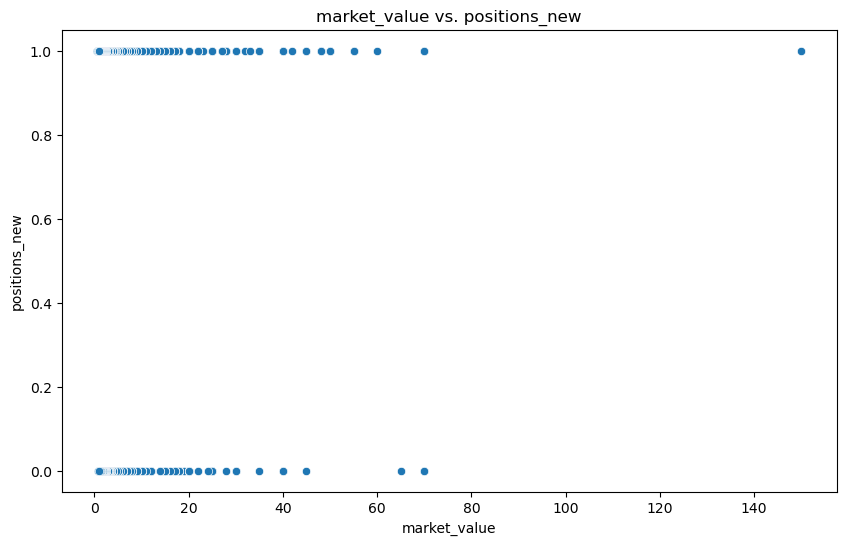

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_value', y='positions_new', data=df4)
plt.title('market_value vs. positions_new')
plt.show()

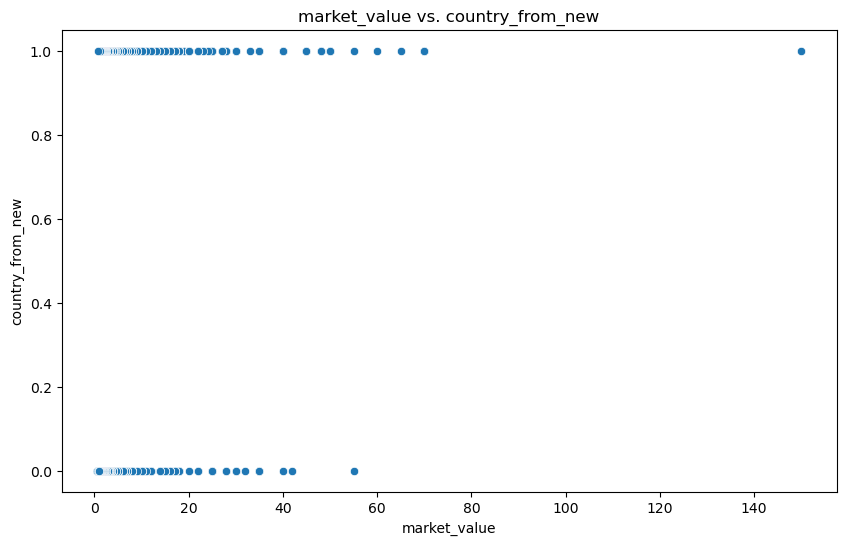

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_value', y='country_from_new', data=df4)
plt.title('market_value vs. country_from_new')
plt.show()

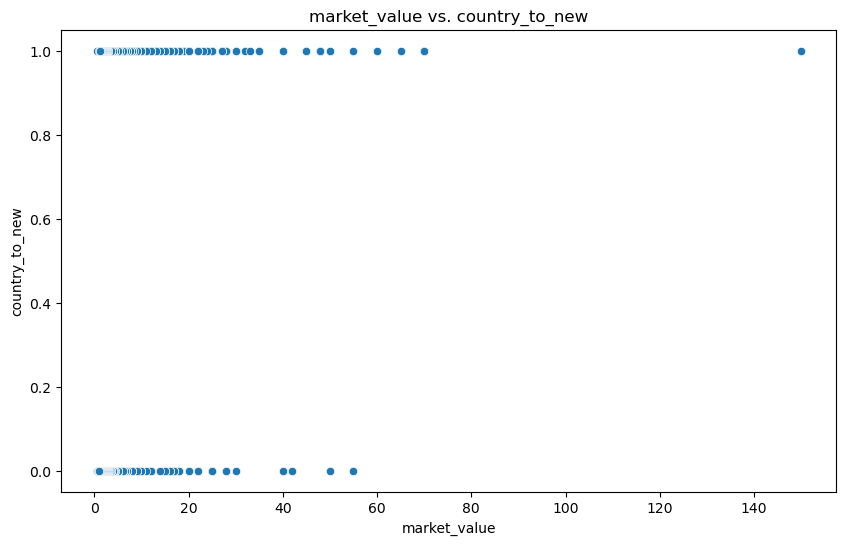

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_value', y='country_to_new', data=df4)
plt.title('market_value vs. country_to_new')
plt.show()

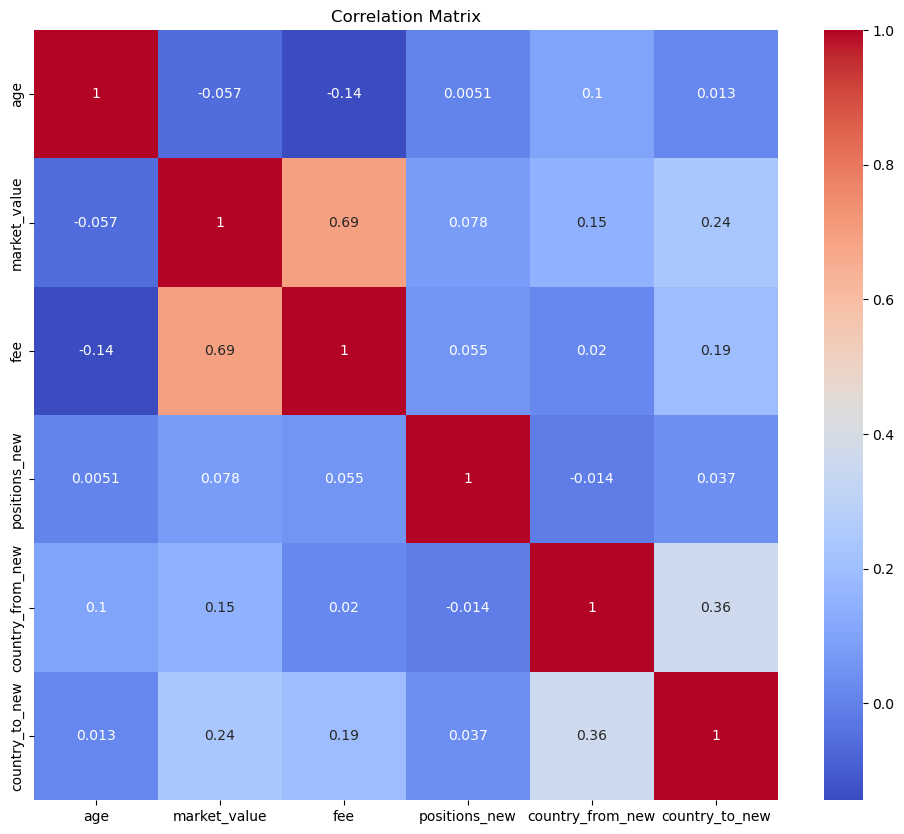

In [161]:
corr_matrix = df4.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [215]:
df5.to_csv('my_dataframe8.csv', index=False)

In [189]:
df5=df4

In [195]:
Q1 = df5['fee'].quantile(0.25)
Q3 = df5['fee'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df5[(df5['fee'] < (Q1 - 1.5 * IQR)) | (df5['fee'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR:")
print(outliers_iqr)

Outliers using IQR:
     age  market_value    fee  positions_new  country_from_new  country_to_new
0     21         150.0  60.00              1                 1               1
1     22          35.0  95.00              0                 0               1
2     21          40.0  80.40              1                 1               1
3     23          55.0  75.00              1                 0               1
4     30          40.0  70.65              1                 1               1
..   ...           ...    ...            ...               ...             ...
153   22          15.0  22.60              1                 0               1
154   22          15.0  15.00              0                 1               1
155   26          15.0  13.50              0                 0               0
168   28          14.0  15.40              0                 1               1
169   24          12.0  14.00              1                 0               0

[85 rows x 6 columns]


In [197]:
Q1 = df5['age'].quantile(0.25)
Q3 = df5['age'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df5[(df5['age'] < (Q1 - 1.5 * IQR)) | (df5['age'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR:")
print(outliers_iqr)

Outliers using IQR:
Empty DataFrame
Columns: [age, market_value, fee, positions_new, country_from_new, country_to_new]
Index: []


In [211]:
median_value = df5['fee'].median()
median_value

0.5

In [205]:
df5['fee_iqr_replaced'] = df5['fee']


In [207]:
df5.loc[(df5['fee'] < (Q1 - 1.5 * IQR)) | (df5['fee'] > (Q3 + 1.5 * IQR)), 'fee_iqr_replaced'] = median_value

In [209]:
df5

,age,market_value,fee,positions_new,country_from_new,country_to_new,fee_iqr_replaced
0,21,150.00,60.00,1,1,1,0.5
1,22,35.00,95.00,0,0,1,0.5
2,21,40.00,80.40,1,1,1,0.5
3,23,55.00,75.00,1,0,1,0.5
4,30,40.00,70.65,1,1,1,0.5
...,...,...,...,...,...,...,...
644,22,0.80,1.00,1,0,0,0.5
645,21,0.75,1.00,1,1,0,0.5
646,24,1.00,0.75,1,0,0,0.5
647,24,1.00,0.35,0,0,0,0.5


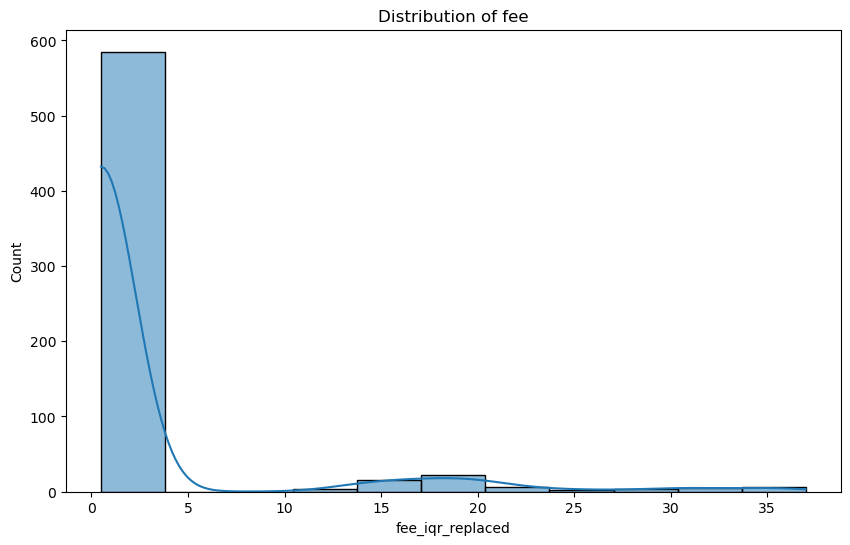

In [213]:
plt.figure(figsize=(10, 6))
sns.histplot(df5['fee_iqr_replaced'], kde=True)
plt.title('Distribution of fee')
plt.show()